# Fichier de visualisation de résultats pour le jeu attaquant-défenseur

## Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

## Récupération des données

In [62]:
dataframe = pd.read_csv("resultats_simu_cout_chgts.csv")

In [63]:
dataframe.head()

,proba is,proba sr,nombre hpb,nombre shp,pic,cumul inf,nb changements sr,nb changements is
0,0.1,0.01,1,0,197.000000,175311.000000,195.000000,15767.333333
1,0.1,0.01,1,1,198.666667,167193.333333,192.000000,15211.000000
2,0.1,0.01,1,2,197.000000,160447.000000,189.000000,14655.000000
3,0.1,0.01,1,3,195.666667,149220.000000,190.666667,13504.666667
4,0.1,0.01,1,4,198.000000,157042.666667,185.000000,14305.666667


## Calcul du coût

In [64]:
cout_inter = 47.1
cout_antiv = 136.2
cout_hp = 1002
cout_shp = 2000.5

In [65]:
K = cout_inter * dataframe['nb changements is'] + cout_antiv * dataframe['nb changements sr'] + cout_hp*dataframe['nombre hpb'] + cout_shp * dataframe['nombre shp']

In [66]:
import numpy as np 
K = K.to_numpy()

In [67]:
## Tests/Vérifs
ma = np.max(K)
mi = np.min(K)
moy = np.mean(K)

print(f"min = {mi}, max = {ma}, moyenne={moy}")

(x,a) = np.unique(K, return_counts=True)

print(len([x for x in a if x > 1]))
print(len(K))
print(len(x))

min = 110612.5, max = 770202.4, moyenne=261383.476661157
1
3025
3024


#### On gère le problème des doublons

In [68]:
(K_unique, ind_k) = np.unique(K, return_index=True)
candidats = [i for i in range(len(K)) if i not in ind_k]
print(candidats)


[2170]


In [69]:
is_tab = dataframe['nb changements is'].to_numpy() 
sr_tab = dataframe['nb changements sr'] .to_numpy()
hb_tab = dataframe['nombre hpb'].to_numpy()
hs_tab = dataframe['nombre shp'].to_numpy()

In [70]:
temp = []
for i in range(len(candidats)): 
    ta=[]
    ta.extend( [is_tab[candidats[i]], sr_tab[candidats[i]], hb_tab[candidats[i]], hs_tab[candidats[i]]] )
    temp.append(ta)

In [71]:
# Test premier jeu de valeurs
is_ind = [x for x in range(len(is_tab)) if is_tab[x] == temp[0][0]]
sr_ind = [x for x in range(len(is_tab)) if sr_tab[x] == temp[0][1]]
hb_ind = [x for x in range(len(is_tab)) if hb_tab[x] == temp[0][2]]
hs_ind = [x for x in range(len(is_tab)) if hs_tab[x] == temp[0][3]]

cand1 = [x for x in is_ind if (x in sr_ind and x in hb_ind and x in hs_ind)]

In [72]:
print(cand1)

[2170]


In [73]:
cumul = dataframe['cumul inf'].to_numpy()
cumul = [cumul[x] for x in range(len(cumul)) if x not in candidats]## on retire les éléments où les K n'étaient pas uniques
print(len(cumul))

3024


In [74]:
regK = np.max(K_unique)
regC = np.max(cumul)

cout = cumul + (regC/regK) * K_unique

## Récupération des résultats et affichage

In [75]:
indexes = np.argsort(cout)

min_indices = indexes[:15]

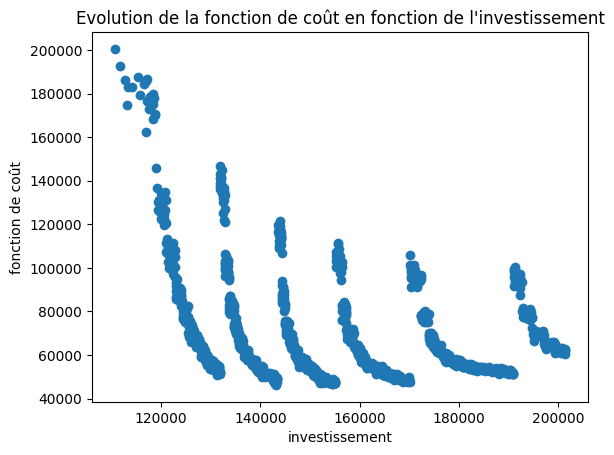

In [76]:
plt.scatter(K_unique[:1500], cout[:1500])
plt.xlabel("investissement")
plt.ylabel("fonction de coût")
plt.title("Evolution de la fonction de coût en fonction de l'investissement")
plt.savefig("simu_close_up")
plt.show()

## Affichage des 15 configurations qui donnent les plus petit coûts

In [77]:
proba_is = dataframe['proba is'].to_numpy()
proba_sr = dataframe['proba sr'].to_numpy()
nb_hps = dataframe['nombre hpb'].to_numpy()
nb_shp = dataframe['nombre shp'].to_numpy()

In [78]:
res = []
for i in range(len(min_indices)): 
    temp = []
    j = min_indices[i]
    temp.extend([proba_is[j], proba_sr[j], nb_hps[j], nb_shp[j], K[j], cumul[j], cout[j]])
    res.append(temp)

In [79]:
df_res = pd.DataFrame(data=res, columns= ["proba is", "proba sr", "nombre hp basiques", "nombre hp intelligents", "investissement", "nombre cumule d'infectés", "coût à minimiser"])

df_res

,proba is,proba sr,nombre hp basiques,nombre hp intelligents,investissement,nombre cumule d'infectés,coût à minimiser
0,0.15,0.060,3,3,117866.4,13702.333333,46263.985325
1,0.20,0.060,3,3,124029.7,11391.000000,46551.034250
2,0.15,0.060,2,4,121525.8,14059.000000,46596.661181
3,0.20,0.060,4,1,122728.8,11477.333333,46676.563195
4,0.20,0.060,1,3,125297.2,11977.000000,46970.327711
5,0.20,0.060,5,3,128465.1,11794.666667,47094.867337
6,0.20,0.060,1,4,131939.4,12117.333333,47111.639796
7,0.20,0.060,3,2,125288.0,11980.000000,47135.937148
8,0.20,0.060,5,2,126172.2,11914.000000,47208.305396
9,0.20,0.055,2,3,131713.2,12478.333333,47216.980615
